In [1]:
import warnings

warnings.filterwarnings('ignore')

# A Deeper Understanding of SVM algorithms

* “Support Vector Machine” (SVM) is a supervised machine learning algorithm. 
* Support Vectors are simply the co-ordinates of individual observation.
* It can be used for both classification or regression challenges. 
* It is mostly used in classification problems.
* capable of performing linear or nonlinear classification, regression, and even outlier detection.
*  SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.
* SVMs are sensitive to the feature **scales**.

In [2]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from IPython.display import Image
import pandas as pd
%matplotlib inline

In [3]:
print(float("inf"))

inf


# Large margin classification

* If classes can clearly be separated easily with a straight line (they are linearly separable)
* The decision boundary of an SVM classifier; this line not only separates the classes but also stays 
as far away from the closest training instances as possible.
* The distances between nearest data point and hyper-plane(decision boundary) is called margin. if this margin is large then this is caled large margin classification.
* The nearest instances from decision boundary is called **support vector**.

In [4]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] 
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

In [6]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    x0 = np.linspace(xmin, xmax, 200)
    a = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    svs = svm_clf.support_vectors_
    decision_boundary = -a[0]/a[1] * x0 - b/a[1]
    margin = 1/a[1]
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#f44336')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, decision_boundary + margin, "k:", linewidth=2)
    plt.plot(x0, decision_boundary - margin, "k:", linewidth=2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


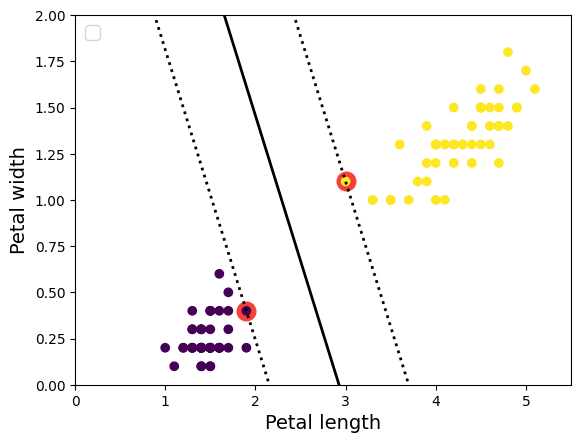

In [7]:
plot_svm_decision_boundary(svm_clf, 0, 5.5)
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
x =plt.axis([0, 5.5, 0, 2])

# Large margin vs margin violations

* If we strictly impose that all instances be off the street and on the right side, this is called **hard margin classification**.
  * There are two main issues with hard margin classification.
      * it only works if the data is linearly separable.
      * it is quite sensitive to outliers.
* If data is not linearly separable or it had outliers, it is preferable to use a more flexible model. 
* The objective is to find a good balance between keeping the street as large as possible and limiting the margin
violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called **soft margin classification**.
* we can get this balance by varing **'C'** hyperparameter.

\begin{array}{|c|c|}
\hline control**C** & street margin  \\\hline
    Low & high margin \\\hline
   High & low margin \\\hline
\end{array}

# Linear classification

In [8]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [9]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [10]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [11]:
#Image(filename ="unscale.JPG", width=500, height=300)

In [12]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

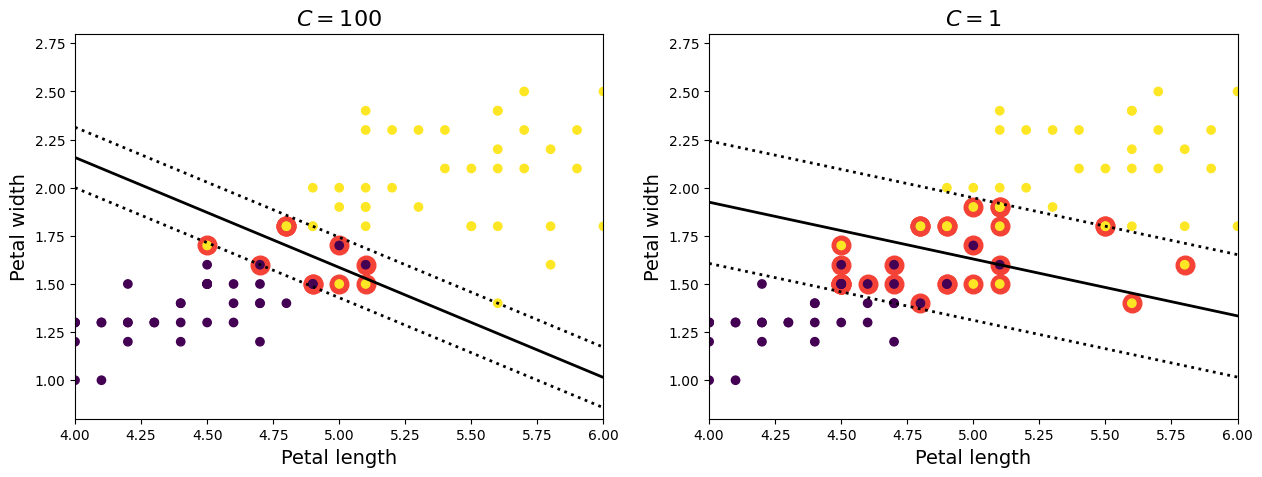

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(122)
plot_svm_decision_boundary(svm_clf1, 4, 6)
plt.scatter(X[:,0],X[:,1], c=y)
plt.axis([4, 6, 0.8, 2.8])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)

plt.subplot(121)
plot_svm_decision_boundary(svm_clf2, 4, 6)
plt.scatter(X[:,0],X[:,1], c=y)
x =plt.axis([4, 6, 0.8, 2.8])
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
x= plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)

**conclusion:**
 * On the left, using a high C value the classifier makes fewer margin violations but ends up with a smaller margin. 
 * On the right, using a low C value the margin is much larger, but many instances end up on the street. 
   * it seems likely that the this classifier will generalize better: in fact even on this training set it makes fewer
   * prediction errors, since most of the margin violations are actually on the correct side of the decision boundary.

# Non-linear classification

* In some case datasets are not even close to being linearly separable. 
<br>
<br>
** Technique to tackle nonlinear problems**:
* add more features, such as polynomial features.
* add features computed using a similarity function.

### 1) Add more features, such as polynomial features

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

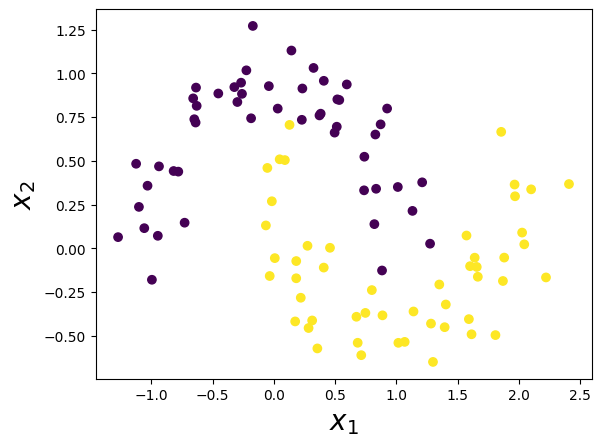

In [15]:
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
x =plt.ylabel(r"$x_2$", fontsize=20)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [17]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    y_decision = clf.decision_function(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


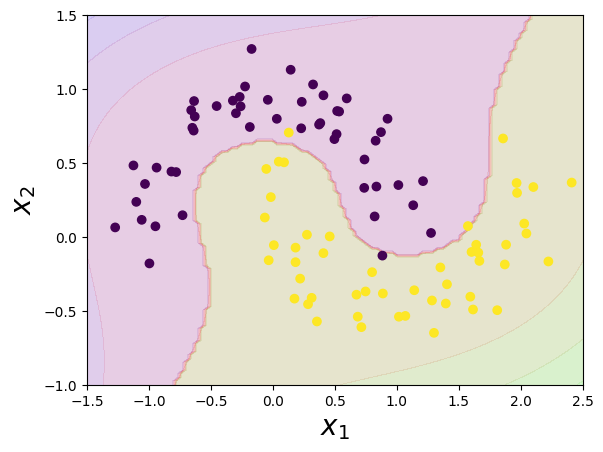

In [18]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5,-1.0,1.5])
x = plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
x =plt.ylabel(r"$x_2$", fontsize=20)

#### Polynomial Kernel

* Adding polynomial features is simple to implement and can work great with all sorts of
Machine Learning algorithms.
* low polynomial degree cannot deal with very complex datasets.
* high polynomial degree creates a huge number of features, making the model too slow

* Fortunately, when using **SVMs** you can apply an almost miraculous mathematical technique called the kernel trick.
* It makes it possible to get
the same result as if you added many polynomial features, even with very high-degree
polynomials, **without actually having to add them**.

In [19]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [20]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

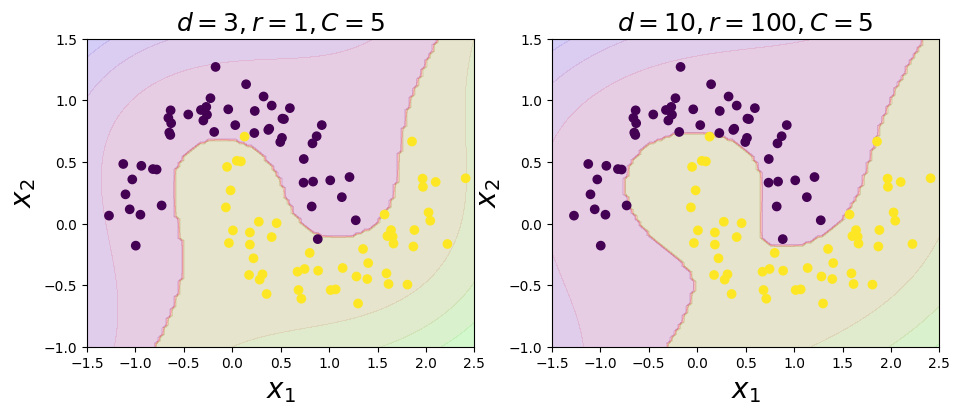

In [21]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5,-1.0,1.5])
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5,-1.0,1.5])
plt.scatter(X[:,0],X[:,1], c=y)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)
x =plt.title(r"$d=10, r=100, C=5$", fontsize=18)

* if your model is overfitting, you might want to reduce the
polynomial degree.
* if it is underfitting, you can try increasing it.
* The
hyperparameter  **coef0** controls how much the model is influenced by high-degree
polynomials versus low-degree polynomials. Polynomial kernel has one issue, with p->inf, it more and more separates pairs of points, for which <x,y> is smaller than 1 and <a,b> with bigger value. This is because powers of values smaller than one gets closer and closer to 0, while the same power of value bigger than one grows to infinity. You can use coef0 to "scale" your data so there is no such distinction.

### 2) Adding Similarity Features - Gamma parameter

* Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.
* Define the similarity function to be the Gaussian Radial Basis Function (RBF).
* **Gaussian Radial Basis Function (RBF)**: It is a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark).
* The simplest approach is to create a landmark at the location of each and every instance in the dataset.This creates many dimensions and thus increases the chances that the transformed training set will be linearly separable.
* The downside is that a training set with m instances and n features gets transformed into a training set with m instances and m features(original dataset is drop)

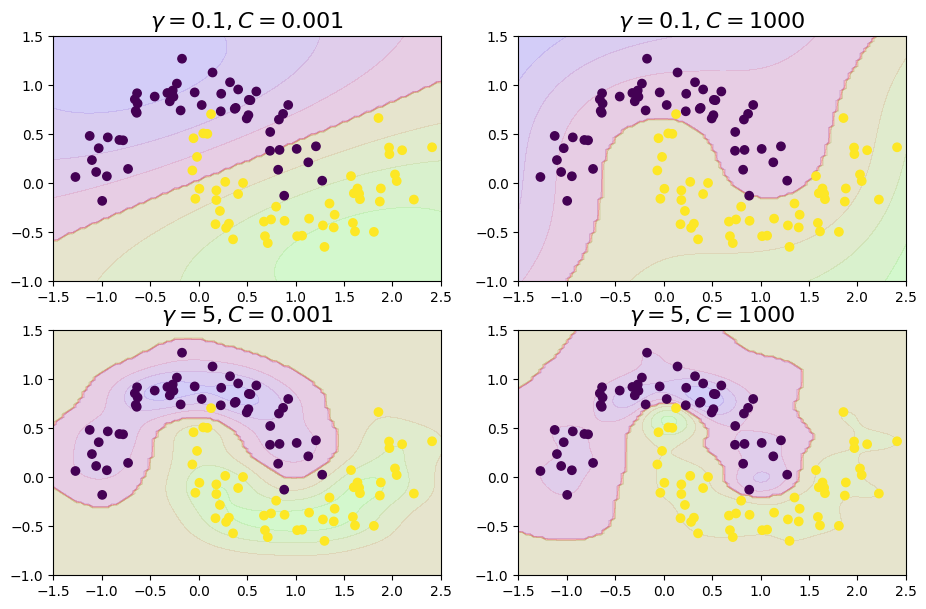

In [22]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plt.scatter(X[:,0],X[:,1], c=y)
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

### About hyperparameter 'gamma':
* The other plots show models trained with different values of hyperparameters gamma (γ) and C. 
* Increasing gamma makes the bell-shape curve narrower , and as a result each instance’s range of influence is smaller: the decision boundary ends up being more **irregular**, wiggling around individual instances. 
* If small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up **smoother**.
* γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it

\begin{array}{|c|c|c|}
\hline control(gamma)) & bell shape & Toward Fitting  \\\hline
    Increase & narrow & over fit \\\hline
   Derease & wide & under fit \\\hline
\end{array}

The kernel trick used with SVMs can help reduce the curse of dimensionality in high-dimensional spaces. Here's how:
- The curse of dimensionality refers to the exponential increase in volume associated with adding extra dimensions to a space. This makes data very sparse and difficult to model.
- By using a kernel, SVMs can map the data into a higher dimensional feature space without computing the coordinates explicitly.
- Common kernels like polynomial or Gaussian kernel allow modeling complex nonlinear decision boundaries.
- This provides a compact way to add higher order feature combinations that can capture meaningful patterns in the data.
- So even with large number of features, the kernel efficiently generates useful nonlinear features to avoid overfitting and improve generalization.
- This means SVMs can build good predictive models on high dimensional data where directly modeling all interactions between raw features would be infeasible.
- Regularization techniques used in SVMs also help avoid overfitting on high dimensional spaces.
So in summary, the kernel trick is a key advantage of SVMs that lets them scale effectively to high dimensions and learn robust decision boundaries from sparse data. This helps mitigate the curse of dimensionality. 

### Back to slides